In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pixelfly import PixelflyBoard, Mode, BinMode, PixelDepth
from analyze_spots import GridSpotIntensitiesMeasurer
from homogenize.homogenize import homogenize
from trap_signal_generator.configuration import StaticTrapConfiguration
from trap_signal_generator.runtime import StaticTrapGenerator

In [49]:
pixelfly = PixelflyBoard(
    name="pixelfly",
    board_number=0,
    mode=Mode.SW_TRIGGER | Mode.ASYNC_SHUTTER,
    exp_time=50,
    hbin=BinMode.BIN_1X,
    vbin=BinMode.BIN_1X,
    gain=False,
    bit_pix=PixelDepth.BITS_12,
)

with pixelfly:
    pixelfly.start_acquisition()
    picture = pixelfly.read_image(1000).astype(float)
    pixelfly.stop_acquisition()


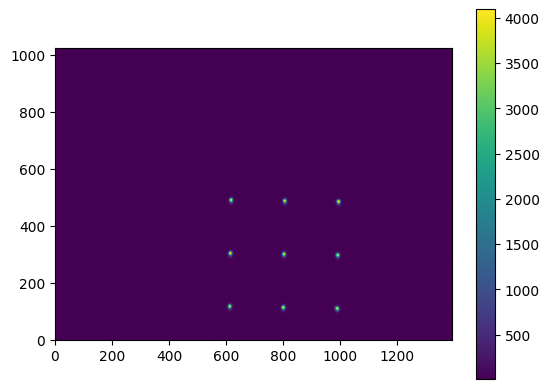

In [50]:
plt.imshow(picture.T, origin="lower")
plt.colorbar()

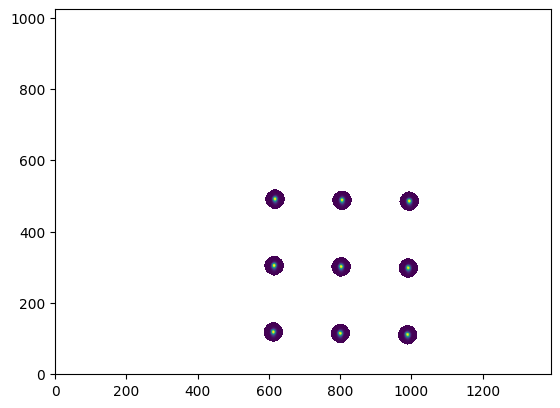

In [51]:
m = GridSpotIntensitiesMeasurer(3, 3)
im = m.register_regions_of_interest(picture, relative_threshold=0.3, radius=30)
plt.figure()
plt.imshow(im.T, origin="lower")

intensities = m.compute_intensity(picture)

In [52]:
(np.max(intensities) - np.min(intensities)) / np.mean(intensities) * 1e2

5.2019301032469745

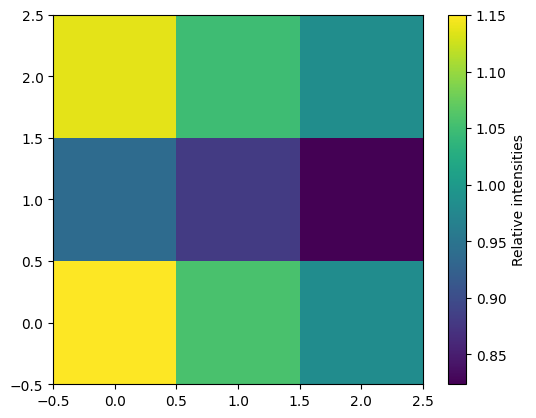

In [17]:
plt.imshow(intensities.T / np.mean(intensities), origin="lower")
cb = plt.colorbar()
cb.set_label("Relative intensities")


In [6]:
with open("../tweezers.utilities.run_awg/config_x.yaml", "r") as f:
    config_x = StaticTrapConfiguration.from_yaml(f.read())

with open("../tweezers.utilities.run_awg/config_y.yaml", "r") as f:
    config_y = StaticTrapConfiguration.from_yaml(f.read())

In [7]:
intensities, amplitudes_x, amplitudes_y = homogenize(StaticTrapGenerator.from_configuration(config_x), StaticTrapGenerator.from_configuration(config_y))


INFO:spectum_awg_m4i66xx_x8.runtime.runtime:Channel X power for segment segment_0: -7.39 dBm
INFO:spectum_awg_m4i66xx_x8.runtime.runtime:Channel Y power for segment segment_0: -7.39 dBm
INFO:spectum_awg_m4i66xx_x8.runtime.runtime:Channel X power for segment segment_0: -7.39 dBm
INFO:spectum_awg_m4i66xx_x8.runtime.runtime:Channel Y power for segment segment_0: -7.39 dBm
INFO:homogenize.homogenize:std/mean = 6.90%
INFO:spectum_awg_m4i66xx_x8.runtime.runtime:Channel X power for segment segment_0: -7.39 dBm
INFO:spectum_awg_m4i66xx_x8.runtime.runtime:Channel Y power for segment segment_0: -7.39 dBm
INFO:homogenize.homogenize:std/mean = 5.66%
INFO:spectum_awg_m4i66xx_x8.runtime.runtime:Channel X power for segment segment_0: -7.39 dBm
INFO:spectum_awg_m4i66xx_x8.runtime.runtime:Channel Y power for segment segment_0: -7.39 dBm
INFO:homogenize.homogenize:std/mean = 4.94%
INFO:spectum_awg_m4i66xx_x8.runtime.runtime:Channel X power for segment segment_0: -7.39 dBm
INFO:spectum_awg_m4i66xx_x8.run

In [9]:
best_shot = np.argmin(np.var(np.var(intensities, axis=-1), axis=-1))
config_x.amplitudes = np.array(amplitudes_x[best_shot]).tolist()
config_y.amplitudes = np.array(amplitudes_y[best_shot]).tolist()

with open("../tweezers.utilities.run_awg/config_x.yaml", "w") as f:
    f.write(config_x.to_yaml())

with open("../tweezers.utilities.run_awg/config_y.yaml", "w") as f:
    f.write(config_y.to_yaml())